# Lead Score Assignment

#### Loading Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading and Inspecting the Data

In [2]:
#Reading dataframe using read_csv
lead_score = pd.read_csv('Leads.csv')

In [3]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the shape of dataframe
lead_score.shape

(9240, 37)

In [5]:
#Checking the column type 
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking the statistical aspects of the dataframe
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking for null values in the dataframe
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Checking the null percentage for the columns

round(((lead_score.isnull().sum()/len(lead_score.index))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping all the values where the missing values are more than 30%

for remove in lead_score.columns:
    if ((lead_score[remove].isnull().sum()/len(lead_score.index))*100)>30:
        lead_score.drop(remove,1,inplace=True)
        

In [10]:
#Checking the null percentage for the columns after removing some columns

round(((lead_score.isnull().sum()/len(lead_score.index))*100),2) 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Conversion Rate of the past order

round(len(lead_score[lead_score['Converted']==1].index)/len(lead_score.index)*100,2)

38.54

In [12]:
#Printing Category wised values 
for columns in lead_score:
    print(lead_score[columns].astype('category').value_counts())
    print('********************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
********************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
********************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
********************************

#### EDA for all columns before dropping it

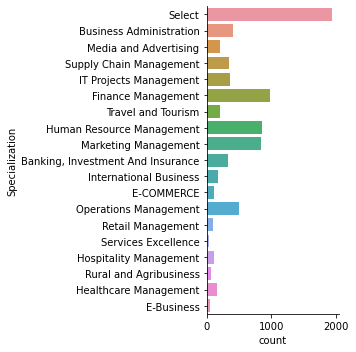

In [13]:
sns.catplot(y='Specialization', data=lead_score, kind="count")
plt.show()

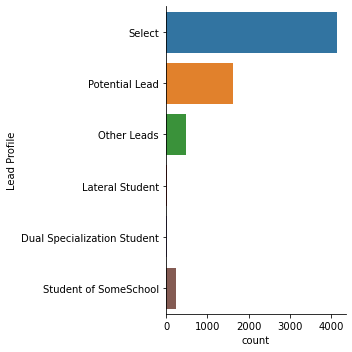

In [14]:
sns.catplot(y='Lead Profile', data=lead_score, kind="count")
plt.show()

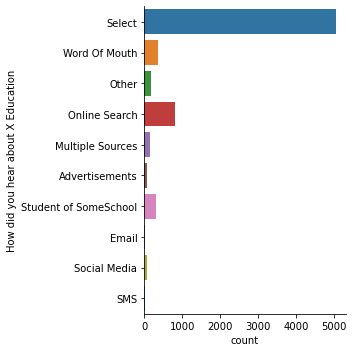

In [15]:
sns.catplot(y='How did you hear about X Education', data=lead_score, kind="count")
plt.show()

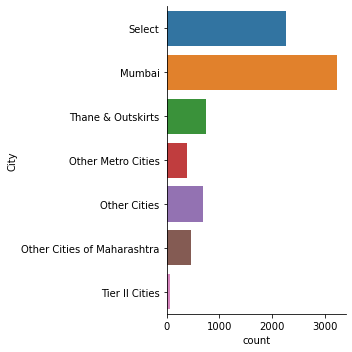

In [16]:
sns.catplot(y='City', data=lead_score, kind="count")
plt.show()

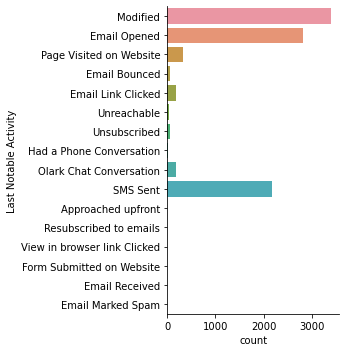

In [17]:
sns.catplot(y='Last Notable Activity', data=lead_score, kind="count")
plt.show()

These are the 4 columns where there are <b>Select</b> column
<ul>
<li>Specialization</li>
<li>How did you hear about X Education</li>
<li>Lead Profile</li>
<li>City</li>
</ul>


In [18]:
# Checking 'Lead Profile' column
lead_score['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
# Checking 'Specialization' column

lead_score['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# Checking 'City' column

lead_score['City'].astype('category').value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
#Checking 'How did you hear about X Education' column

lead_score['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

For our analysis the variable city and country are of no use.

We can confirm that <b>Select</b> category in <b>How did you hear about X Education</b> and <b>Lead Profile</b> is more

So we will drop the mentioned columns

In [22]:
#Dropping 'City' column

lead_score.drop(['City'],axis = 1,inplace=True)

In [23]:
#Dropping 'Lead Profile' column
lead_score.drop(['Lead Profile'],axis = 1,inplace=True)

In [24]:
#Dropping 'Country' column
lead_score.drop(['Country'],axis = 1,inplace=True)

In [25]:
#Dropping 'How did you hear about X Education'
lead_score.drop(['How did you hear about X Education'],axis = 1,inplace=True)

In [26]:
#Checking null values after dropping some columns
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

For the below columns we can see most of the data are NO.
<ul>
<li>Do Not Email</li>
<li>Do Not Call</li>
<li>Search</li>
<li>Magazine</li>
<li>Newspaper Article</li>
<li>X Education Forums</li>
<li>Newspaper</li>
<li>Digital Advertisement</li>
<li>Through Recommendations</li>
<li>Receive More Updates About Our Courses</li>
<li>Update me on Supply Chain Content</li>
<li>Get updates on DM Content</li>
<li>I agree to pay the amount through cheque</li>
<li>A free copy of Mastering The Interview</li>
</ul>

As these columns are not required for our analysis, we will remove these columns.

In [27]:
lead_score.drop(['Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

the variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [28]:
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
lead_score.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [30]:
lead_score.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### Removing null values 

In [31]:
lead_score = lead_score[~pd.isnull(lead_score['TotalVisits'])]

In [32]:
lead_score = lead_score[~pd.isnull(lead_score['Lead Source'])]

In [33]:
lead_score = lead_score[~pd.isnull(lead_score['What is your current occupation'])]

In [34]:
lead_score = lead_score[~pd.isnull(lead_score['Specialization'])]

In [35]:
#Checking null values
lead_score.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [36]:
total_data_after_null_removal = lead_score.shape[0]

In [37]:
percentage_from_total = total_data_after_null_removal / 9240

In [38]:
percentage_from_total

0.6897186147186147

In [39]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


for analysis Prospect ID and Lead Number is not required . So will remove it

In [40]:
lead_score.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [41]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [42]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Call                             6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

## EDA

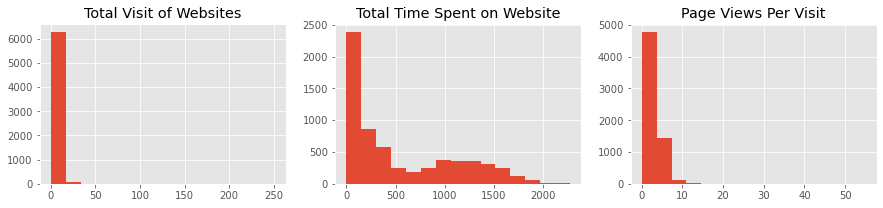

In [43]:
#Ploting hist plot
plt.style.use('ggplot')

plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
plt.hist(lead_score['TotalVisits'],bins=15)
plt.title('Total Visit of Websites')

plt.subplot(3, 3, 2)
plt.hist(lead_score['Total Time Spent on Website'],bins=15)
plt.title('Total Time Spent on Website')

plt.subplot(3, 3, 3)
plt.hist(lead_score['Page Views Per Visit'],bins=15)
plt.title('Page Views Per Visit')

plt.show()



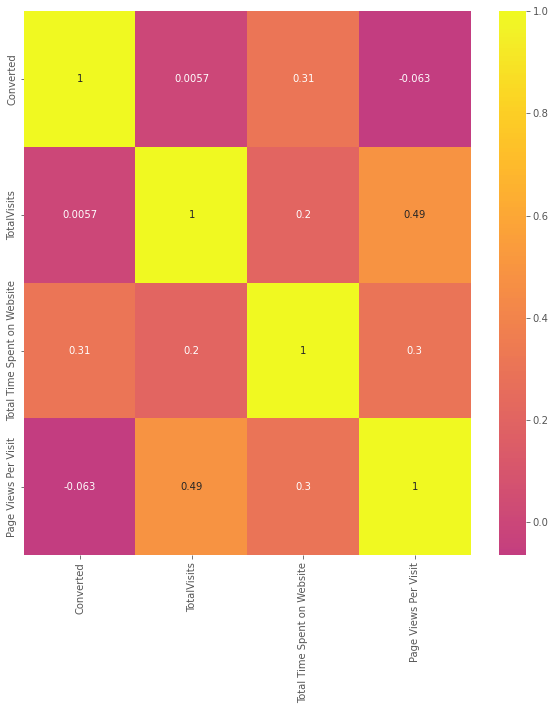

In [44]:
#Plotting heatmap
plt.figure(figsize=(10,10))

sns.heatmap(lead_score.corr(),cmap='plasma',center=0,annot=True)

plt.show()

<b> Inference: </b> Pages Views Per Visit is corelated with total visits.

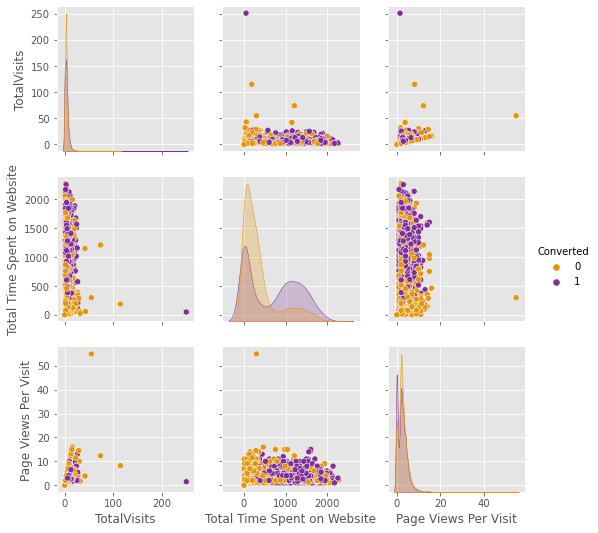

In [45]:
#Plotting pair-plot for better understanding
sns.pairplot(lead_score,diag_kind='kde',hue='Converted',palette='CMRmap_r')
plt.show()

#### Outlier

Text(0.5, 1.0, 'Page Views Per Visit')

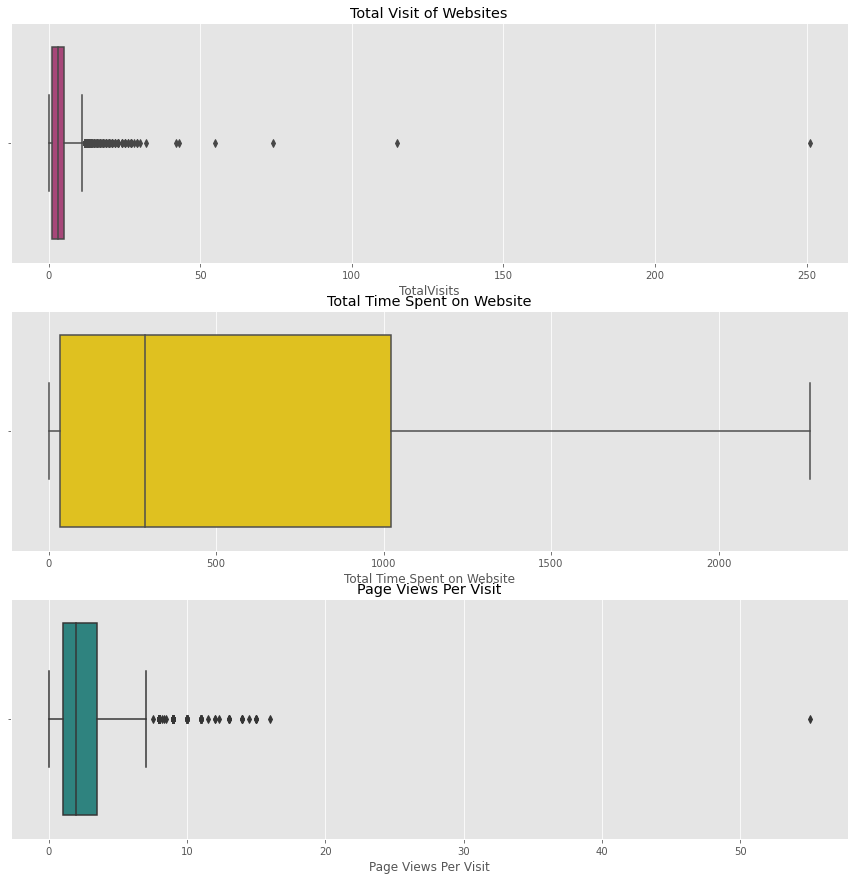

In [46]:
plt.figure(figsize=(15,15))

plt.subplot(3, 1, 1)
sns.boxplot(lead_score['TotalVisits'],palette='magma')
plt.title('Total Visit of Websites')

plt.subplot(3, 1, 2)
sns.boxplot(lead_score['Total Time Spent on Website'],palette='prism')
plt.title('Total Time Spent on Website')

plt.subplot(3, 1, 3)
sns.boxplot(lead_score['Page Views Per Visit'],palette='viridis')
plt.title('Page Views Per Visit')


<b> Inference: </b> There are more number of outliers in TotalVisits and Page Views Per Visit

## Dummy Variable Creation

In [47]:
# To check the columns having datatype object

obj = lead_score.loc[:,lead_score.dtypes=='object']
obj.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Creating dummy variables

lead_score_dummy = pd.get_dummies(lead_score[['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']] , drop_first=True)

lead_score = pd.concat([lead_score,lead_score_dummy],axis=1)

In [49]:
# dummy variable for specialization

lead_score_dummy_specialization = pd.get_dummies(lead_score['Specialization'] , prefix = 'Specialization')

In [50]:
#We are removing Select as this is for those variable which havent selected any specialization

lead_score_dummy_specialization.drop = lead_score_dummy_specialization.drop(['Specialization_Select'],1)

In [51]:
lead_score = pd.concat([lead_score,lead_score_dummy_specialization],axis=1)

In [52]:
# removing the variables having dummy variables

lead_score = lead_score.drop(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],1)

In [53]:
lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [54]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

## Train - Test Split

In [55]:
#importing the library

from sklearn.model_selection import train_test_split

In [56]:
#variable X

X = lead_score.drop(['Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 93 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6373 non-null   float64
 1   Total Time Spent on Website                           6373 non-null   int64  
 2   Page Views Per Visit                                  6373 non-null   float64
 3   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 5   Lead Origin_Lead Import                               6373 non-null   uint8  
 6   Lead Source_Direct Traffic                            6373 non-null   uint8  
 7   Lead Source_Facebook                                  6373 non-null   uint8  
 8   Lead Source_Google                                    6373

In [58]:
# target variable in y

y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# spliting the dataset into 70% train to 30% test

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state = 100)

### Scaling

In [60]:
#import minmax scaler package

from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [63]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### correlation

In [64]:
lead_score.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.093559,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,-0.208327,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,-0.253959,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,-0.331176,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,-0.688526,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.061011,-0.006014,-0.020352,-0.014828
Specialization_Select,-0.093559,-0.208327,-0.253959,-0.331176,-0.688526,0.072725,0.027800,-0.347613,0.031028,-0.034601,...,-0.094008,-0.216932,-0.102490,-0.162761,-0.070865,-0.061011,1.000000,-0.039952,-0.135194,-0.098501
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,-0.039952,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.135194,-0.013327,1.000000,-0.032857


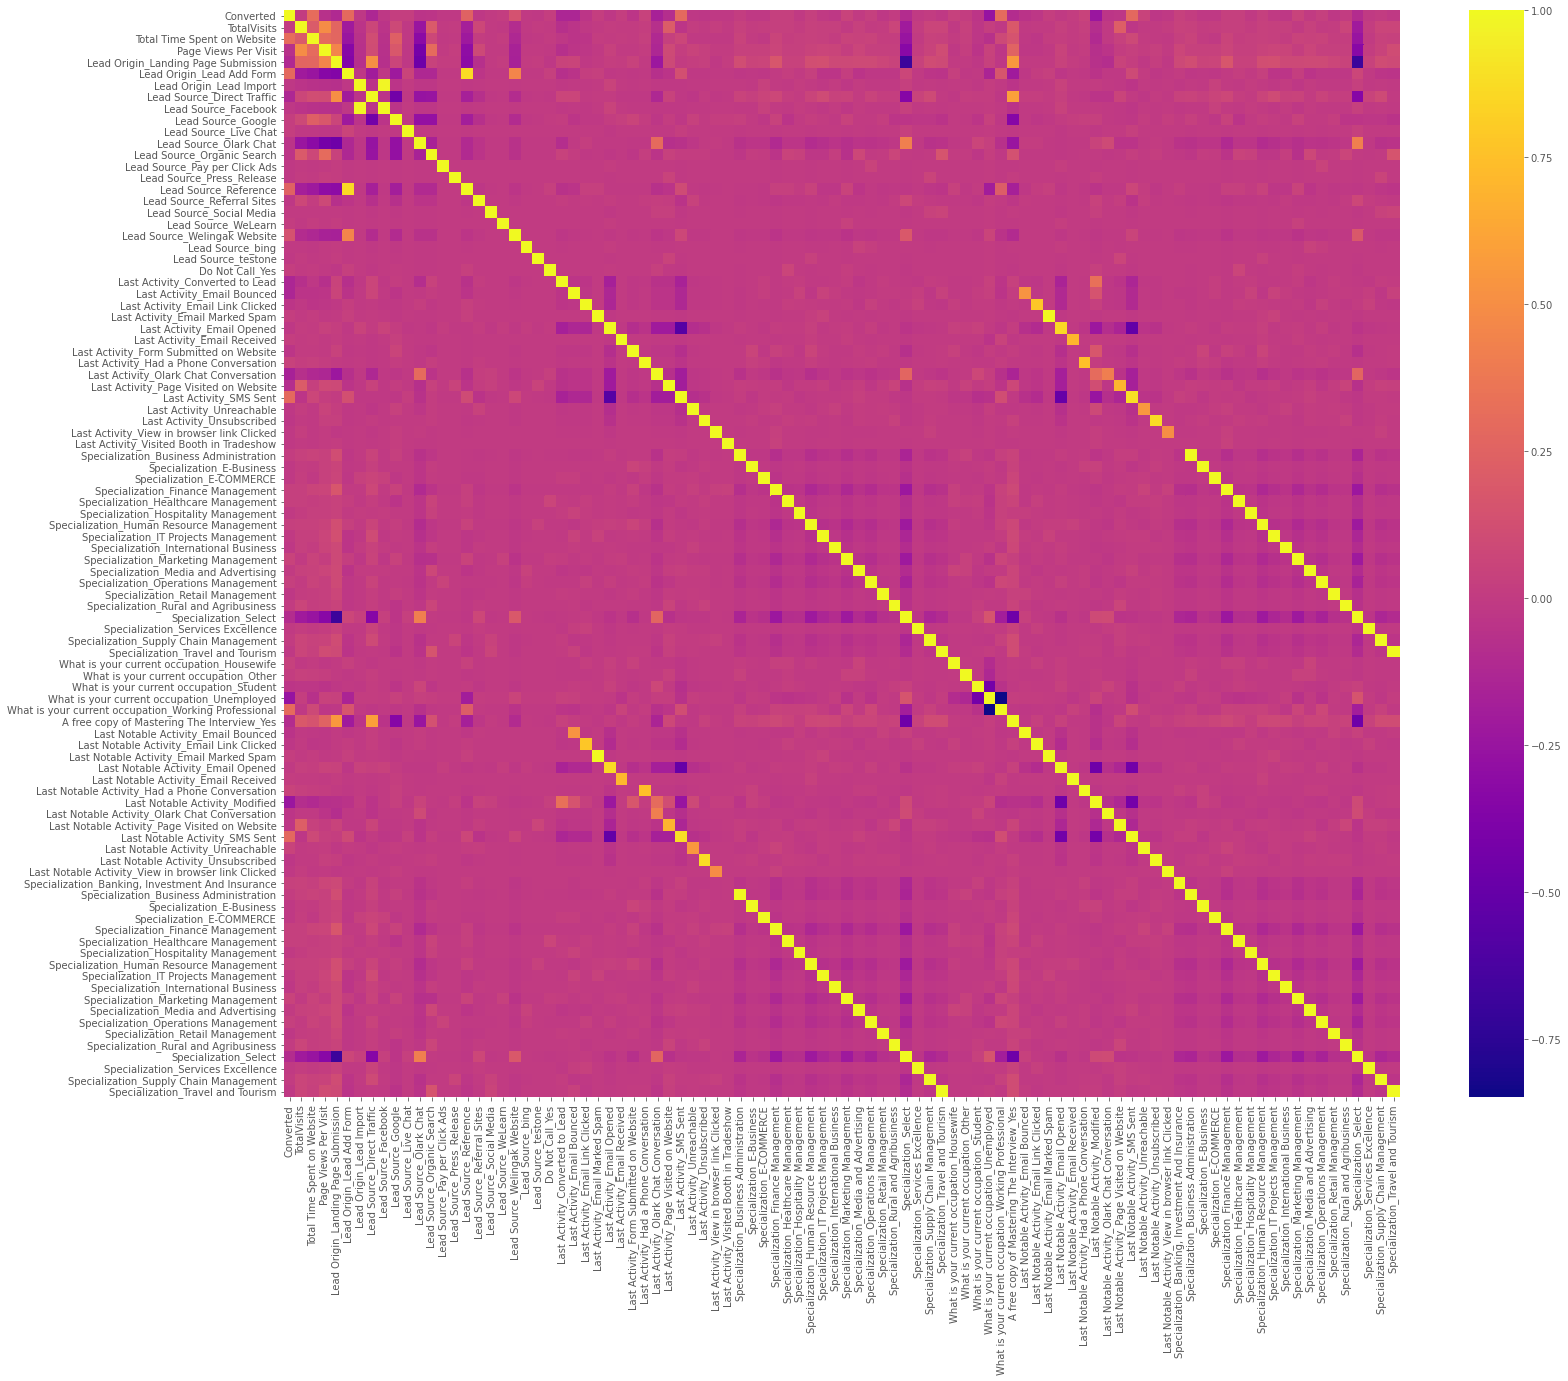

In [65]:
#histogram

plt.figure(figsize=(25,20))

sns.heatmap(lead_score.corr(),cmap='plasma')

plt.show()


## Model Building

In [66]:
# import logistic regression package

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report

In [67]:
lead_score_logreg = LogisticRegression()

lead_score_logreg.fit(X_train,y_train)

LogisticRegression()

In [68]:
training_accuracy = lead_score_logreg.score(X_train,y_train)

training_accuracy

0.7986998430845103

In [69]:
test_accuracy = lead_score_logreg.score(X_test,y_test)

test_accuracy

0.5287656903765691

In [70]:
lead_score_prediction = lead_score_logreg.predict(X_test)

In [71]:
#confusion matrix

lead_score_confusion_matrix = confusion_matrix(y_test,lead_score_prediction)

In [72]:
print(lead_score_confusion_matrix)

[[136 860]
 [ 41 875]]


In [73]:
lead_score_classification_report = classification_report(y_test,lead_score_prediction)

In [74]:
print(lead_score_classification_report)

              precision    recall  f1-score   support

           0       0.77      0.14      0.23       996
           1       0.50      0.96      0.66       916

    accuracy                           0.53      1912
   macro avg       0.64      0.55      0.45      1912
weighted avg       0.64      0.53      0.44      1912



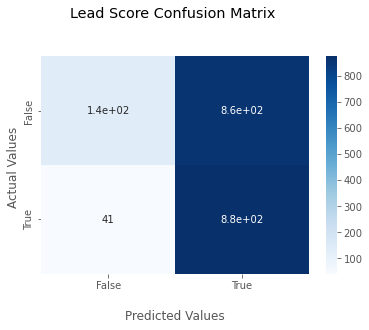

In [75]:
ax = sns.heatmap(lead_score_confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Lead Score Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [76]:
lead_score_logreg.predict_proba(X_test)

array([[0.00294197, 0.99705803],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [77]:
#Importing RFE and selecting 15 variable

from sklearn.feature_selection import RFE

In [78]:
lead_score_rfe = RFE(lead_score_logreg,15)

lead_score_rfe = lead_score_rfe.fit(X_train,y_train)

In [79]:
#features which is selected by rfe

feature = list(zip(X_train.columns,lead_score_rfe.support_,lead_score_rfe.ranking_))

feature

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 79),
 ('Lead Source_WeLearn', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_testone', False, 32),
 ('Do Not Call_Yes', False, 37),
 ('Last Activity_Converted to Lead', False, 19),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link C

In [80]:
support_column = X_train.columns[lead_score_rfe.support_]

support_column

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [81]:
not_support_column = X_train.columns[~lead_score_rfe.support_]

not_support_column

Index(['Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone',
       'Do Not Call_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Ad

In [82]:
X_train = X_train[support_column]

X_train

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,1,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,1,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,1,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,0,1,0,0,0,0,1,0,0,1,0,0,0
100,0.027888,0.718750,0,0,0,0,0,0,0,0,0,1,0,0,0
5877,0.011952,0.752201,1,0,0,0,0,0,1,0,0,1,0,0,0
8658,0.015936,0.187060,1,0,0,0,0,0,0,0,0,1,0,0,0


In [83]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [84]:
import statsmodels.api as sm

In [85]:
X_train_sm = sm.add_constant(X_train)

lead_score_logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

lead_score_res = lead_score_logm2.fit()

lead_score_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.3
Date:                Fri, 12 Nov 2021   Deviance:                       4178.7
Time:                        17:55:52   Pearson chi2:                 4.90e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8480      0.605     -1.401      0.161      -2.034       0.338
TotalVisits                                             10.6372      2.840      3.746      0.000       5.071      16.203
Total Time Spent on Website                              4.4661      0.185     24.198      0.000       4.104       4.828
Lead Origin_Landing Page Submission                     -0.3231      0.097     -3.316      0.001      -0.514      -0.132
Lead Origin_Lead Add Form                                3.9546      0.266     14.859      0.000       3.433       4.476
Lead Source_Olark Chat                                   1.2460      0.138      9.034      0.000       0.976       1.516
Lead Source_Welingak Website                             2.1088      1.036      2.035      0.042       0.078       4.140
Last Activity_Email Bounced                             -1.6618      0.366     -4.542      0.000      -2.379      -0.945
Last Activity_Had a Phone Conversation                   0.9848      0.982      1.003      0.316      -0.939       2.909
Last Activity_SMS Sent                                   1.1267      0.082     13.731      0.000       0.966       1.288
What is your current occupation_Housewife               22.7903   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
What is your current occupation_Student                 -1.0833      0.632     -1.713      0.087      -2.323       0.156
What is your current occupation_Unemployed              -1.2976      0.597     -2.174      0.030      -2.467      -0.128
What is your current occupation_Working Professional     1.3399      0.626      2.141      0.032       0.113       2.567
Last Notable Activity_Had a Phone Conversation          23.3176   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.8076      0.807      3.479      0.001       1.226       4.389
========================================================================================================================
"""

In [86]:
#importing vif 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
#making vif

lead_score_vif = pd.DataFrame()

lead_score_vif['Features'] = X_train.columns

lead_score_vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

lead_score_vif['VIF'] = round(lead_score_vif['VIF'],2)

lead_score_vif = lead_score_vif.sort_values(by='VIF',ascending=False)

lead_score_vif

,Features,VIF
11,What is your current occupation_Unemployed,6.39
2,Lead Origin_Landing Page Submission,3.78
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
12,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.62


In [88]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [89]:
lead_score_logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lead_score_logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.9
Date:                Fri, 12 Nov 2021   Deviance:                       4183.7
Time:                        17:55:52   Pearson chi2:                 4.90e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1426      0.113    -18.906      0.000      -2.365      -1.920
TotalVisits                                             11.0291      2.849      3.871      0.000       5.446      16.613
Total Time Spent on Website                              4.4686      0.184     24.225      0.000       4.107       4.830
Lead Origin_Landing Page Submission                     -0.3243      0.097     -3.329      0.001      -0.515      -0.133
Lead Origin_Lead Add Form                                3.9602      0.266     14.882      0.000       3.439       4.482
Lead Source_Olark Chat                                   1.2481      0.138      9.048      0.000       0.978       1.518
Lead Source_Welingak Website                             2.1033      1.036      2.030      0.042       0.072       4.134
Last Activity_Email Bounced                             -1.6686      0.366     -4.562      0.000      -2.386      -0.952
Last Activity_Had a Phone Conversation                   0.9737      0.982      0.992      0.321      -0.951       2.898
Last Activity_SMS Sent                                   1.1181      0.082     13.646      0.000       0.958       1.279
What is your current occupation_Housewife               24.0804   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                  0.2075      0.217      0.956      0.339      -0.218       0.633
What is your current occupation_Working Professional     2.6311      0.197     13.343      0.000       2.245       3.018
Last Notable Activity_Had a Phone Conversation          23.3139   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.8085      0.806      3.487      0.000       1.230       4.387
========================================================================================================================
"""

In [90]:
#making vif

lead_score_vif = pd.DataFrame()

lead_score_vif['Features'] = X_train.columns

lead_score_vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

lead_score_vif['VIF'] = round(lead_score_vif['VIF'],2)

lead_score_vif = lead_score_vif.sort_values(by='VIF',ascending=False)

lead_score_vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
2,Lead Origin_Landing Page Submission,2.16
1,Total Time Spent on Website,1.93
8,Last Activity_SMS Sent,1.55
0,TotalVisits,1.52
3,Lead Origin_Lead Add Form,1.52
5,Lead Source_Welingak Website,1.33
11,What is your current occupation_Working Profes...,1.21
4,Lead Source_Olark Chat,1.07


In [91]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [92]:
lead_score_logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lead_score_logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2098.8
Date:                Fri, 12 Nov 2021   Deviance:                       4197.6
Time:                        17:55:53   Pearson chi2:                 4.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1333      0.113    -18.865      0.000      -2.355      -1.912
TotalVisits                                             10.8135      2.838      3.811      0.000       5.252      16.375
Total Time Spent on Website                              4.4670      0.184     24.254      0.000       4.106       4.828
Lead Origin_Landing Page Submission                     -0.3162      0.097     -3.253      0.001      -0.507      -0.126
Lead Origin_Lead Add Form                                3.9707      0.266     14.936      0.000       3.450       4.492
Lead Source_Olark Chat                                   1.2429      0.138      9.022      0.000       0.973       1.513
Lead Source_Welingak Website                             2.0873      1.036      2.014      0.044       0.056       4.118
Last Activity_Email Bounced                             -1.6782      0.366     -4.590      0.000      -2.395      -0.962
Last Activity_Had a Phone Conversation                   0.9664      0.981      0.985      0.325      -0.957       2.890
Last Activity_SMS Sent                                   1.1082      0.082     13.545      0.000       0.948       1.269
What is your current occupation_Student                  0.1999      0.217      0.921      0.357      -0.225       0.625
What is your current occupation_Working Professional     2.6234      0.197     13.309      0.000       2.237       3.010
Last Notable Activity_Had a Phone Conversation          22.3120   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Notable Activity_Unreachable                        2.7982      0.805      3.474      0.001       1.220       4.377
========================================================================================================================
"""

In [93]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [94]:
lead_score_logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lead_score_logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.8
Date:                Fri, 12 Nov 2021   Deviance:                       4203.7
Time:                        17:55:53   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1362      0.113    -18.889      0.000      -2.358      -1.915
TotalVisits                                             10.9267      2.838      3.851      0.000       5.365      16.489
Total Time Spent on Website                              4.4592      0.184     24.231      0.000       4.099       4.820
Lead Origin_Landing Page Submission                     -0.3115      0.097     -3.206      0.001      -0.502      -0.121
Lead Origin_Lead Add Form                                3.9739      0.266     14.948      0.000       3.453       4.495
Lead Source_Olark Chat                                   1.2461      0.138      9.045      0.000       0.976       1.516
Lead Source_Welingak Website                             2.0872      1.036      2.014      0.044       0.056       4.118
Last Activity_Email Bounced                             -1.6775      0.366     -4.589      0.000      -2.394      -0.961
Last Activity_Had a Phone Conversation                   2.7667      0.803      3.444      0.001       1.192       4.341
Last Activity_SMS Sent                                   1.1078      0.082     13.545      0.000       0.948       1.268
What is your current occupation_Student                  0.1997      0.217      0.921      0.357      -0.225       0.625
What is your current occupation_Working Professional     2.6204      0.197     13.293      0.000       2.234       3.007
Last Notable Activity_Unreachable                        2.7973      0.805      3.474      0.001       1.219       4.376
========================================================================================================================
"""

In [95]:
lead_score_vif = pd.DataFrame()

lead_score_vif['Features'] = X_train.columns

lead_score_vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

lead_score_vif['VIF'] = round(lead_score_vif['VIF'],2)

lead_score_vif = lead_score_vif.sort_values(by='VIF',ascending=False)

lead_score_vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.16
1,Total Time Spent on Website,1.93
8,Last Activity_SMS Sent,1.55
0,TotalVisits,1.52
3,Lead Origin_Lead Add Form,1.51
5,Lead Source_Welingak Website,1.32
10,What is your current occupation_Working Profes...,1.21
4,Lead Source_Olark Chat,1.07
6,Last Activity_Email Bounced,1.04
9,What is your current occupation_Student,1.04


## Model Evaluation

In [96]:
X_train.shape

(4461, 12)

In [97]:
y_train.shape

(4461,)

In [98]:
X_train_sm = sm.add_constant(X_train)

lead_score_logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

lead_score_res = lead_score_logm2.fit()

lead_score_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.8
Date:                Fri, 12 Nov 2021   Deviance:                       4203.7
Time:                        17:55:53   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1362      0.113    -18.889      0.000      -2.358      -1.915
TotalVisits                                             10.9267      2.838      3.851      0.000       5.365      16.489
Total Time Spent on Website                              4.4592      0.184     24.231      0.000       4.099       4.820
Lead Origin_Landing Page Submission                     -0.3115      0.097     -3.206      0.001      -0.502      -0.121
Lead Origin_Lead Add Form                                3.9739      0.266     14.948      0.000       3.453       4.495
Lead Source_Olark Chat                                   1.2461      0.138      9.045      0.000       0.976       1.516
Lead Source_Welingak Website                             2.0872      1.036      2.014      0.044       0.056       4.118
Last Activity_Email Bounced                             -1.6775      0.366     -4.589      0.000      -2.394      -0.961
Last Activity_Had a Phone Conversation                   2.7667      0.803      3.444      0.001       1.192       4.341
Last Activity_SMS Sent                                   1.1078      0.082     13.545      0.000       0.948       1.268
What is your current occupation_Student                  0.1997      0.217      0.921      0.357      -0.225       0.625
What is your current occupation_Working Professional     2.6204      0.197     13.293      0.000       2.234       3.007
Last Notable Activity_Unreachable                        2.7973      0.805      3.474      0.001       1.219       4.376
========================================================================================================================
"""

In [99]:
# predicting the probability of the train set
y_train_pred = lead_score_res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.262266
218     0.129371
4171    0.115741
4037    0.291076
3660    0.950051
207     0.228655
2044    0.210652
6411    0.961941
6498    0.059587
2085    0.980638
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26226607, 0.12937123, 0.11574066, 0.29107553, 0.95005148,
       0.22865534, 0.21065155, 0.96194089, 0.05958732, 0.98063827])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values , 'Converted_prob':y_train_pred})

In [102]:
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.262266
1,0,0.129371
2,1,0.115741
3,1,0.291076
4,1,0.950051


In [103]:
#create new column if the pred is more than 50%(0.5)

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()


,Converted,Converted_prob,Predicted
0,0,0.262266,0
1,0,0.129371,0
2,1,0.115741,0
3,1,0.291076,0
4,1,0.950051,1


#### Model Evaluation

In [104]:
from sklearn import metrics

In [105]:
lead_score_confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [106]:
print(lead_score_confusion)

[[1924  388]
 [ 571 1578]]


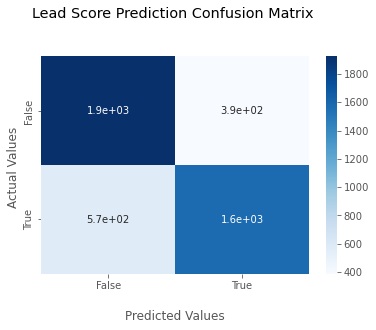

In [107]:
lead_score_pred_heatmap = sns.heatmap(lead_score_confusion, annot=True, cmap='Blues')

lead_score_pred_heatmap.set_title('Lead Score Prediction Confusion Matrix \n\n');
lead_score_pred_heatmap.set_xlabel('\nPredicted Values')
lead_score_pred_heatmap.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
lead_score_pred_heatmap.xaxis.set_ticklabels(['False','True'])
lead_score_pred_heatmap.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [108]:
lead_score_accuracy_score_train = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [109]:
lead_score_accuracy_score_train

0.7850257789733244

In [110]:
true_positive = lead_score_confusion[1,1]

true_negative = lead_score_confusion[0,0]

false_positive = lead_score_confusion[0,1]

false_negative = lead_score_confusion[1,0]

#### Calculating Sensitivity

In [111]:
lead_score_train_sensitivity = true_positive / (true_positive + false_negative)

In [112]:
lead_score_train_sensitivity

0.7342950209399721

#### Calculating Specificity

In [113]:
lead_score_train_specificity = true_negative / (true_negative + false_positive)

In [114]:
lead_score_train_specificity

0.8321799307958477

### Finding the Optimal Cutoff

In [115]:
def lead_score_draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob , drop_intermediate = False)

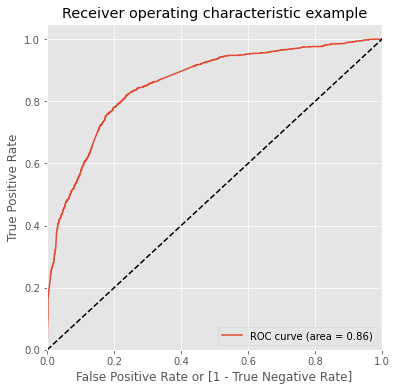

In [117]:
lead_score_draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [118]:
# Columns with different probability cutoffs

train_num = [float(x)/10 for x in range(10)]

for i in train_num:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.262266,0,1,1,1,0,0,0,0,0,0,0
1,0,0.129371,0,1,1,0,0,0,0,0,0,0,0
2,1,0.115741,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291076,0,1,1,1,0,0,0,0,0,0,0
4,1,0.950051,1,1,1,1,1,1,1,1,1,1,1


Creating a dataframe to check the values of accuracy,sensitivity and specificity for probability cutoff

In [119]:
lead_score_cutoff_train = pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])

cutoff_num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in cutoff_num:
    conf_matrix_train = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total_train = sum(sum(conf_matrix_train))
    
    Accuracy = (conf_matrix_train[0,0]+conf_matrix_train[1,1])/total_train
    
    Specificity = conf_matrix_train[0,0]/(conf_matrix_train[0,0]+conf_matrix_train[0,1])
    
    Sensitivity = conf_matrix_train[1,1]/(conf_matrix_train[1,0]+conf_matrix_train[1,1])
    
    lead_score_cutoff_train.loc[i] = [i,Accuracy,Sensitivity,Specificity]
    
print(lead_score_cutoff_train)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.521856     0.992089     0.084775
0.2          0.2  0.689083     0.947883     0.448529
0.3          0.3  0.765523     0.864123     0.673875
0.4          0.4  0.789285     0.800372     0.778979
0.5          0.5  0.785026     0.734295     0.832180
0.6          0.6  0.754091     0.619823     0.878893
0.7          0.7  0.731899     0.537459     0.912630
0.8          0.8  0.709258     0.446254     0.953720
0.9          0.9  0.642233     0.275942     0.982699


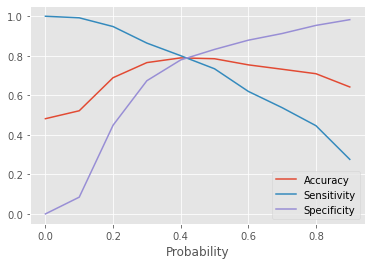

In [120]:
lead_score_cutoff_train.plot.line(x='Probability',y=['Accuracy','Sensitivity','Specificity'])

plt.show()

In [121]:
y_train_pred_final['Final Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,0,0.262266,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.129371,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.115741,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291076,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.950051,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
lead_score_accuracy_score_train_1 = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final['Final Predicted'])

In [123]:
lead_score_accuracy_score_train_1

0.7895090786819099

In [124]:
lead_score_confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final['Final Predicted'])

In [125]:
print(lead_score_confusion_1)

[[1831  481]
 [ 458 1691]]


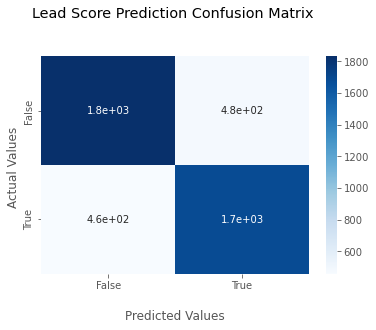

In [126]:
lead_score_pred_heatmap = sns.heatmap(lead_score_confusion_1, annot=True, cmap='Blues')

lead_score_pred_heatmap.set_title('Lead Score Prediction Confusion Matrix \n\n');
lead_score_pred_heatmap.set_xlabel('\nPredicted Values')
lead_score_pred_heatmap.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
lead_score_pred_heatmap.xaxis.set_ticklabels(['False','True'])
lead_score_pred_heatmap.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [127]:
true_positive = lead_score_confusion_1[1,1]

true_negative = lead_score_confusion_1[0,0]

false_positive = lead_score_confusion_1[0,1]

false_negative = lead_score_confusion_1[1,0]

In [128]:
lead_score_train_sensitivity = true_positive / (true_positive + false_negative)
lead_score_train_sensitivity

0.78687761749651

In [129]:
lead_score_train_specificity = true_negative / (true_negative + false_positive)
lead_score_train_specificity

0.791955017301038

## Prediction on Test Set

In [130]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [131]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [132]:
X_test = X_test[support_column]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,1,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,1,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,1,0,0,0,0,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,1,0,0,0,0,0,1,0,0,1,0,0,0


In [133]:
X_test_sm = sm.add_constant(X_test)

In [134]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,1,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,1,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,1,0,0,0,0,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,1,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,1,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,1,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,0,0,1,0,0,1,0,0,0


In [135]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [136]:
X_test.drop(['What is your current occupation_Housewife', 
             'What is your current occupation_Unemployed', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [137]:
y_test_pred = lead_score_res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996189
6122    0.117801
9202    0.666623
6570    0.617896
2668    0.683717
4233    0.944700
3368    0.749337
9091    0.439705
5972    0.246865
3631    0.756383
dtype: float64

In [138]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
y_pred_1.head()

,0
4771,0.996189
6122,0.117801
9202,0.666623
6570,0.617896
2668,0.683717


In [140]:
lead_score_y_test = pd.DataFrame(y_test)

In [141]:
y_pred_1.reset_index(drop=True, inplace=True)
lead_score_y_test.reset_index(drop=True, inplace=True)

In [142]:
y_pred_test_final = pd.concat([lead_score_y_test, y_pred_1],axis=1)

In [143]:
y_pred_test_final.head()

,Converted,0
0,1,0.996189
1,0,0.117801
2,0,0.666623
3,1,0.617896
4,1,0.683717


In [144]:
y_pred_test_final = y_pred_test_final.rename(columns = {0:'Converted_prob'})

y_pred_test_final.head()

,Converted,Converted_prob
0,1,0.996189
1,0,0.117801
2,0,0.666623
3,1,0.617896
4,1,0.683717


In [145]:
y_pred_test_final['Final Predicted'] = y_pred_test_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_pred_test_final.head()

,Converted,Converted_prob,Final Predicted
0,1,0.996189,1
1,0,0.117801,0
2,0,0.666623,1
3,1,0.617896,1
4,1,0.683717,1


In [146]:
lead_score_accuracy_score_test = metrics.accuracy_score(y_pred_test_final.Converted,y_pred_test_final['Final Predicted'])

In [147]:
lead_score_accuracy_score_test

0.7907949790794979

In [148]:
lead_score_confusion_test = metrics.confusion_matrix(y_pred_test_final.Converted,y_pred_test_final['Final Predicted'])

In [149]:
print(lead_score_confusion_test)

[[793 203]
 [197 719]]


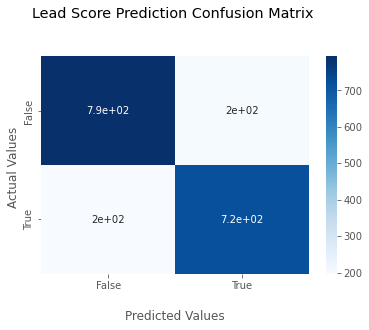

In [150]:
lead_score_pred_heatmap = sns.heatmap(lead_score_confusion_test, annot=True, cmap='Blues')

lead_score_pred_heatmap.set_title('Lead Score Prediction Confusion Matrix \n\n');
lead_score_pred_heatmap.set_xlabel('\nPredicted Values')
lead_score_pred_heatmap.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
lead_score_pred_heatmap.xaxis.set_ticklabels(['False','True'])
lead_score_pred_heatmap.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [151]:
true_positive = lead_score_confusion_test[1,1]

true_negative = lead_score_confusion_test[0,0]

false_positive = lead_score_confusion_test[0,1]

false_negative = lead_score_confusion_test[1,0]

In [152]:
# Sensitivity

lead_score_test_sensitivity = true_positive / float(true_positive + false_negative)

lead_score_test_sensitivity

0.7849344978165939

In [153]:
# Specificity

lead_score_test_specificity = true_negative / (true_negative + false_positive)

lead_score_test_specificity

0.7961847389558233

## PRECISION RECALL

In [154]:
train_confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

print(train_confusion)

[[1924  388]
 [ 571 1578]]


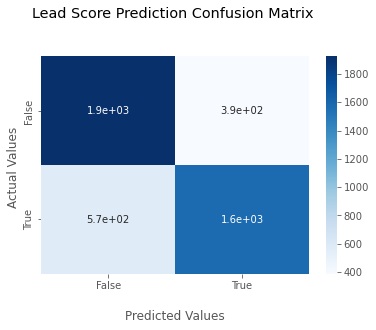

In [155]:
lead_score_pred_heatmap = sns.heatmap(train_confusion, annot=True, cmap='Blues')

lead_score_pred_heatmap.set_title('Lead Score Prediction Confusion Matrix \n\n');
lead_score_pred_heatmap.set_xlabel('\nPredicted Values')
lead_score_pred_heatmap.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
lead_score_pred_heatmap.xaxis.set_ticklabels(['False','True'])
lead_score_pred_heatmap.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [156]:
true_positive = train_confusion[1,1]

true_negative = train_confusion[0,0]

false_positive = train_confusion[0,1]

false_negative = train_confusion[1,0]

In [157]:
lead_score_precision = true_positive/(true_positive+false_positive)

In [158]:
lead_score_precision

0.8026449643947101

In [159]:
lead_score_recall = true_positive/(true_positive+false_negative)

In [160]:
lead_score_recall

0.7342950209399721

## Precision-Recall View

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
y_train_pred_final.Converted , y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

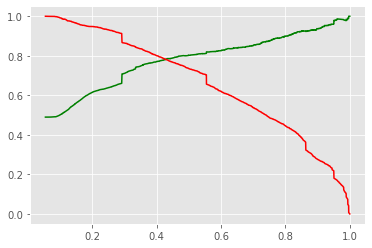

In [164]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [165]:
y_train_pred_final['Final Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,0,0.262266,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.129371,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.115741,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291076,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.950051,1,1,1,1,1,1,1,1,1,1,1,1


In [166]:
accuracy_score_train = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final['Final Predicted'])

In [167]:
accuracy_score_train

0.7892849136964806

In [168]:
train_confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final['Final Predicted'])

print(train_confusion_1)

[[1801  511]
 [ 429 1720]]


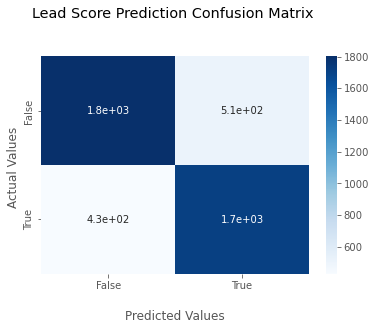

In [169]:
lead_score_pred_heatmap = sns.heatmap(train_confusion_1, annot=True, cmap='Blues')

lead_score_pred_heatmap.set_title('Lead Score Prediction Confusion Matrix \n\n');
lead_score_pred_heatmap.set_xlabel('\nPredicted Values')
lead_score_pred_heatmap.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
lead_score_pred_heatmap.xaxis.set_ticklabels(['False','True'])
lead_score_pred_heatmap.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [170]:
true_positive = train_confusion_1[1,1]

true_negative = train_confusion_1[0,0]

false_positive = train_confusion_1[0,1]

false_negative = train_confusion_1[1,0]

In [171]:
lead_score_precision_1 = true_positive/(true_positive+false_positive)

In [172]:
lead_score_precision_1

0.7709547288211565

In [173]:
lead_score_recall_1 = true_positive/(true_positive+false_negative)

In [174]:
lead_score_recall_1

0.8003722661703118

### Prediction Test Set

In [175]:
y_test_pred_1 = lead_score_res.predict(sm.add_constant(X_test))
y_test_pred_1[:10]

4771    0.996189
6122    0.117801
9202    0.666623
6570    0.617896
2668    0.683717
4233    0.944700
3368    0.749337
9091    0.439705
5972    0.246865
3631    0.756383
dtype: float64

In [176]:
y_pred_2 = pd.DataFrame(y_test_pred_1)

In [177]:
y_pred_2.head()

,0
4771,0.996189
6122,0.117801
9202,0.666623
6570,0.617896
2668,0.683717


In [178]:
lead_score_y_test_1 = pd.DataFrame(y_test)

In [179]:
y_pred_2.reset_index(drop=True, inplace=True)
lead_score_y_test_1.reset_index(drop=True, inplace=True)

In [180]:
y_pred_test_final_1 = pd.concat([lead_score_y_test_1, y_pred_2],axis=1)

In [181]:
y_pred_test_final_1.head()

,Converted,0
0,1,0.996189
1,0,0.117801
2,0,0.666623
3,1,0.617896
4,1,0.683717


In [182]:
y_pred_test_final_1 = y_pred_test_final_1.rename(columns = {0:'Converted_prob'})

y_pred_test_final_1.head()

,Converted,Converted_prob
0,1,0.996189
1,0,0.117801
2,0,0.666623
3,1,0.617896
4,1,0.683717


In [183]:
y_pred_test_final_1['Final Predicted'] = y_pred_test_final_1.Converted_prob.map( lambda x: 1 if x > 0.44 else 0)

y_pred_test_final_1.head()

,Converted,Converted_prob,Final Predicted
0,1,0.996189,1
1,0,0.117801,0
2,0,0.666623,1
3,1,0.617896,1
4,1,0.683717,1


In [184]:
accuracy_score_test = metrics.accuracy_score(y_pred_test_final_1.Converted,y_pred_test_final_1['Final Predicted'])

In [185]:
accuracy_score_test

0.7892259414225942

In [186]:
train_confusion_2 = metrics.confusion_matrix(y_pred_test_final_1.Converted,y_pred_test_final_1['Final Predicted'])

print(train_confusion_2)

[[804 192]
 [211 705]]


In [187]:
true_positive = train_confusion_1[1,1]

true_negative = train_confusion_1[0,0]

false_positive = train_confusion_1[0,1]

false_negative = train_confusion_1[1,0]

In [188]:
lead_score_precision_1 = true_positive/(true_positive+false_positive)

In [189]:
lead_score_precision_1

0.7709547288211565

In [190]:
lead_score_recall_1 = true_positive/(true_positive+false_negative)

In [191]:
lead_score_recall_1

0.8003722661703118

#### Summary

As per the analysis below are the top 3 columns with variable which need to focus for increasing the conversion up to 79%
1. Total Time Spent on Website
2. Total Visits on Website
3. What is your current Occupation
• Working Profession
• Student